In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Accuracy: 0.9246794871794872


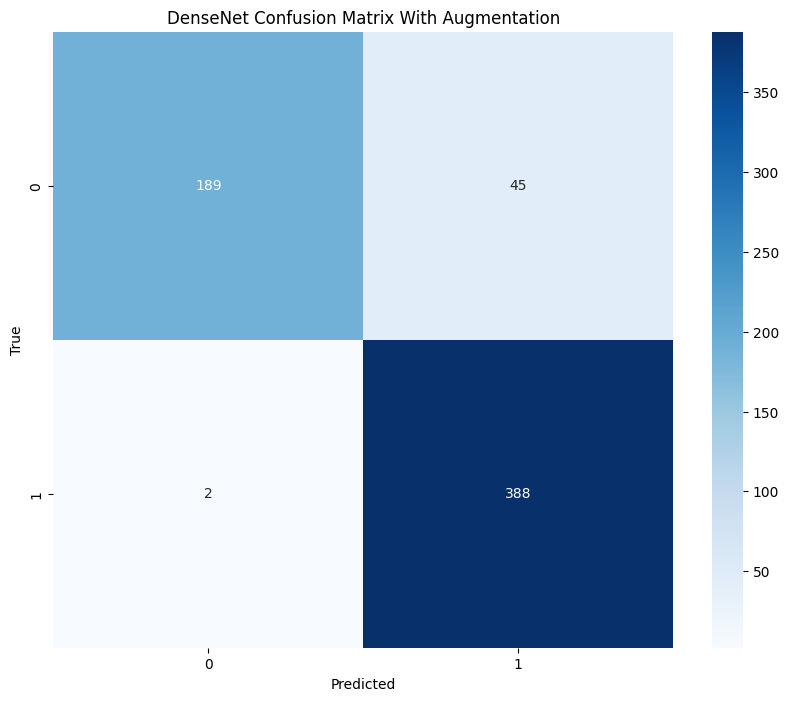

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modeli tanımlama ve ağırlıkları yükleme
model = models.densenet121(pretrained=False)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, 2)  # Örneğin 2 sınıflı bir çıktı
model_path = "/content/drive/MyDrive/DeepLearningProject/Saved_Models/DenseNet_Model_With_Augumentation.pth"
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

# Test veri setini hazırlama
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/DeepLearningProject/Cognitive_Project_Dataset/chest_xray/chest_xray/test', transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Modeli test veri seti üzerinde değerlendirme
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Doğruluk (accuracy) hesaplama
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy}")

# Confusion Matrix oluşturma
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('DenseNet Confusion Matrix With Augmentation')
plt.show()
